In [1]:
using StatsBase
using GLM
using NearestNeighbors
using DataFrames
using Gadfly
using Cairo
using Fontconfig
using Formatting
using Compose, Colors

In [2]:
subhalo = readtable("./dat/eagle/nugals.dat")

13200×45 DataFrames.DataFrame
│ Row   │ x     │ GalaxyId │ LastProgID │ TopLeafID │ DescendantID │
├───────┼───────┼──────────┼────────────┼───────────┼──────────────┤
│ 1     │ 0     │ 3523445  │ 3524788    │ 3523471   │ 3523445      │
│ 2     │ 1     │ 3524789  │ 3525684    │ 3524815   │ 3524789      │
│ 3     │ 2     │ 3525685  │ 3527039    │ 3525711   │ 3525685      │
│ 4     │ 3     │ 3527040  │ 3528198    │ 3527066   │ 3527040      │
│ 5     │ 4     │ 3528199  │ 3528960    │ 3528225   │ 3528199      │
│ 6     │ 5     │ 60032592 │ 60032831   │ 60032615  │ 60032592     │
│ 7     │ 6     │ 60024236 │ 60024395   │ 60024262  │ 60024236     │
│ 8     │ 7     │ 60024601 │ 60024801   │ 60024627  │ 60024601     │
│ 9     │ 8     │ 60025595 │ 60025846   │ 60025621  │ 60025595     │
│ 10    │ 9     │ 60025847 │ 60026009   │ 60025874  │ 60025847     │
│ 11    │ 10    │ 60028289 │ 60028608   │ 60028315  │ 60028289     │
⋮
│ 13189 │ 13188 │ 6773409  │ 6773582    │ 6773435   │ 6773409      │
│ 13190 │ 13189 │ 6876475  │ 6876706    │ 6876501   │ 6876475      │
│ 13191 │ 13190 │ 6894497  │ 6894631    │ 6894523   │ 6894497      │
│ 13192 │ 13191 │ 6917728  │ 6917968    │ 6917754   │ 6917728      │
│ 13193 │ 13192 │ 7118992  │ 7119238    │ 7119018   │ 7118992      │
│ 13194 │ 13193 │ 7374947  │ 7375192    │ 7374973   │ 7374947      │
│ 13195 │ 13194 │ 7548913  │ 7549081    │ 7548939   │ 7548913      │
│ 13196 │ 13195 │ 7779366  │ 7779579    │ 7779393   │ 7779366      │
│ 13197 │ 13196 │ 60733083 │ 60733183   │ 60733109  │ 60733083     │
│ 13198 │ 13197 │ 60975666 │ 60975855   │ 60975692  │ 60975666     │
│ 13199 │ 13198 │ 61518775 │ 61518903   │ 61518801  │ 61518775     │
│ 13200 │ 13199 │ 61598240 │ 61598507   │ 61598266  │ 61598240     │

│ Row   │ GroupID        │ GroupNumber │ SubGroupNumber │
├───────┼────────────────┼─────────────┼────────────────┤
│ 1     │ 28000000000003 │ 4           │ 29             │
│ 2     │ 28000000000003 │ 4           │ 33             │
│ 3     │ 28000000000003 │ 4           │ 34             │
│ 4     │ 28000000000003 │ 4           │ 39             │
│ 5     │ 28000000000003 │ 4           │ 40             │
│ 6     │ 28000000000003 │ 4           │ 290            │
│ 7     │ 28000000000003 │ 4           │ 193            │
│ 8     │ 28000000000003 │ 4           │ 206            │
│ 9     │ 28000000000003 │ 4           │ 215            │
│ 10    │ 28000000000003 │ 4           │ 221            │
│ 11    │ 28000000000003 │ 4           │ 253            │
⋮
│ 13189 │ 28000300001375 │ 23468       │ 0              │
│ 13190 │ 28000300002307 │ 24400       │ 0              │
│ 13191 │ 28000300002479 │ 24572       │ 0              │
│ 13192 │ 28000300002694 │ 24787       │ 0              │
│ 13193 │ 28000300004627 │ 26720       │ 0              │
│ 13194 │ 28000300006325 │ 28418       │ 0              │
│ 13195 │ 28000400000832 │ 30289       │ 0              │
│ 13196 │ 28000400002294 │ 31751       │ 0              │
│ 13197 │ 28000500004216 │ 41037       │ 0              │
│ 13198 │ 28000700000223 │ 51772       │ 0              │
│ 13199 │ 28000900002358 │ 68635       │ 0              │
│ 13200 │ 28000900003798 │ 70075       │ 0              │

│ Row   │ Image_box                                                                                                 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 1     │ "\"<img src='http://virgodb.cosma.dur.ac.uk/eagle-webstorage/RefL0100N1504_Subhalo/galrand_3523445.png'>\"" │
│ 2     │ "\"<img src='http://virgodb.cosma.dur.ac.uk/eagle-webstorage/RefL0100N1504_Subhalo/galrand_3524789.png'>\"" │
│ 3     │ "\"<img src='http://virgodb.cosma.dur.ac.uk/eagle-webstorage/RefL0100N1504_Subhalo/galrand_3525685.png'>\"" │
│ 4     │ "\"<img src='http://virgodb.cosma.dur.ac.uk/eagle-webstorage/RefL0100N1504_Subhalo/galrand_3527040.png'>\"" │
│ 5     │ "\"<img src='http://virgodb.cosma.dur.ac.uk/eagle-webstorage/Re

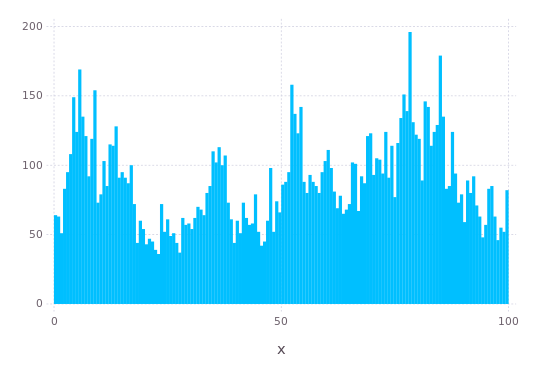

  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31

In [8]:
plot(x=subhalo[:CentreOfPotential_x], Geom.histogram)

In [3]:
# get the data to compare

fulldf = DataFrame()

probnames = [:foo, :galid, :groupid, :cenid, :rband, :Psat, :Mh, :foo2, :foo3, :foo4, :projR, :projrad, :angRh]
corrnames = [:foo5, :galid, :M_r, :M_g, :cz, :Dn4000, :H_delta, :logsSFR, :stelM, :ra, :dec, :vdisp, :S2N, :sersic,
             :conc, :KplusA, :R_exp, :surfdens1kpc, :surfdensR_e, :surfdensR_eo2, :vdisp_err, :Bulge2Tlr, :B2T_err,
             :GMoR_e, :R_e]

probfiles = ["dat/clf_groups_M18_M9.4.prob", "dat/clf_groups_M19_M9.8.prob", "dat/clf_groups_M20_M10.3.prob"]
corrfiles = ["dat/clf_groups_M18_M9.4.galdata_corr", "dat/clf_groups_M19_M9.8.galdata_corr", "dat/clf_groups_M20_M10.2.galdata_corr"]
densfiles = ["dat/density_r10.M18_M9.4", "dat/density_r10.M19_M9.8", "dat/density_r10.M20_M10.3"]
randfiles = ["dat/drandom_r10.M18_M9.4", "dat/drandom_r10.M19_M9.8", "dat/drandom_r10.M20_M10.3"]

for i in 1:3
    
    # read the two catalogues in and join them on galaxy id
    probdf = readtable(probfiles[i], separator=' ', header=false)
    names!(probdf, probnames)
    corrdf = readtable(corrfiles[i], separator=' ', header=false)
    names!(corrdf, corrnames)
    
    # add a column for the density, corrected with the randoms
    density = readdlm(densfiles[i])
    rands = readdlm(randfiles[i])
    ρ_corr = 1.25 * (density[:, 1] ./ rands[:, 1])
    probdf[:ρ_env] = DataArray(ρ_corr)
    
    joindf = join(probdf, corrdf, on=:galid)
   
    if i == 1
        fulldf = joindf
    else
        fulldf = [fulldf; joindf]
    end
end

fulldf = unique(fulldf, :galid)
    

# remove any galaxies in environment density less than or equal to zero, to avoid computational issues
fulldf = fulldf[fulldf[:ρ_env] .> 0.0, :]

# remove bad measurements of R_e, vdisp (i.e. where they are zero)
fulldf = fulldf[fulldf[:R_e] .> 0.0, :]
fulldf = fulldf[fulldf[:vdisp] .> 0.0, :]

allgals = copy(fulldf)

# Take only the quenched galaxies
fulldf = fulldf[fulldf[:Dn4000] .> 1.6, :]

# add a column for log10 of stellar mass and log of environment
fulldf[:log10M] = log10.(fulldf[:stelM])
fulldf[:logρ] = log10.(fulldf[:ρ_env])
fulldf[:logρ2] = fulldf[:logρ] .^ 2
fulldf[:logM2] = fulldf[:log10M] .^ 2

# Now take all the rows out which don't have central galaxies
fulldf = fulldf[fulldf[:Psat] .< 0.01, :]


50413×42 DataFrames.DataFrame
│ Row   │ foo      │ galid  │ groupid │ cenid  │ rband    │ Psat │ Mh         │
├───────┼──────────┼────────┼─────────┼────────┼──────────┼──────┼────────────┤
│ 1     │ "PROB10" │ 17     │ 2485    │ 17     │ -20.4593 │ 0.0  │ 1.5053e12  │
│ 2     │ "PROB10" │ 83     │ 824     │ 83     │ -20.8211 │ 0.0  │ 4.7694e12  │
│ 3     │ "PROB10" │ 93     │ 607     │ 93     │ -21.3781 │ 0.0  │ 6.43239e12 │
│ 4     │ "PROB10" │ 99     │ 11864   │ 99     │ -18.7129 │ 0.0  │ 2.64106e11 │
│ 5     │ "PROB10" │ 218    │ 1424    │ 218    │ -20.839  │ 0.0  │ 2.72175e12 │
│ 6     │ "PROB10" │ 222    │ 1611    │ 222    │ -20.3164 │ 0.0  │ 2.39733e12 │
│ 7     │ "PROB10" │ 237    │ 12835   │ 237    │ -18.4337 │ 0.0  │ 2.41424e11 │
│ 8     │ "PROB10" │ 267    │ 3524    │ 267    │ -20.2159 │ 0.0  │ 1.0267e12  │
│ 9     │ "PROB10" │ 303    │ 9229    │ 303    │ -19.1946 │ 0.0  │ 3.50912e11 │
│ 10    │ "PROB10" │ 888    │ 7205    │ 888    │ -19.4307 │ 0.0  │ 4.63695e11 │
│ 11    │ "PROB10" │ 895    │ 4041    │ 895    │ -20.0255 │ 0.0  │ 8.83634e11 │
⋮
│ 50402 │ "PROB10" │ 558766 │ 51270   │ 558766 │ -20.2808 │ 0.0  │ 1.5053e12  │
│ 50403 │ "PROB10" │ 558803 │ 48408   │ 558803 │ -20.3895 │ 0.0  │ 1.60297e12 │
│ 50404 │ "PROB10" │ 558841 │ 25198   │ 558841 │ -20.7531 │ 0.0  │ 3.23725e12 │
│ 50405 │ "PROB10" │ 558858 │ 36813   │ 558858 │ -20.5562 │ 0.0  │ 2.15758e12 │
│ 50406 │ "PROB10" │ 558870 │ 11182   │ 558870 │ -21.3951 │ 0.0  │ 7.4717e12  │
│ 50407 │ "PROB10" │ 558895 │ 24098   │ 558895 │ -20.8707 │ 0.0  │ 3.3942e12  │
│ 50408 │ "PROB10" │ 558933 │ 29489   │ 558933 │ -20.7718 │ 0.0  │ 2.73853e12 │
│ 50409 │ "PROB10" │ 558942 │ 36316   │ 558942 │ -20.4865 │ 0.0  │ 2.18968e12 │
│ 50410 │ "PROB10" │ 558957 │ 42020   │ 558957 │ -20.4118 │ 0.0  │ 1.86992e12 │
│ 50411 │ "PROB10" │ 558968 │ 24316   │ 558968 │ -20.7879 │ 0.0  │ 3.36167e12 │
│ 50412 │ "PROB10" │ 558994 │ 5549    │ 558994 │ -21.683  │ 0.0  │ 1.42019e13 │
│ 50413 │ "PROB10" │ 558998 │ 7936    │ 558998 │ -21.4794 │ 0.0  │ 1.03407e13 │

│ Row   │ foo2    │ foo3       │ foo4    │ projR │ projrad │ angRh       │
├───────┼─────────┼────────────┼─────────┼───────┼─────────┼─────────────┤
│ 1     │ 0.0     │ 1.5053e12  │ 0.0     │ 0.0   │ 0.0     │ 0.00248969  │
│ 2     │ 2.05249 │ 4.7694e12  │ 2.05249 │ 0.0   │ 0.0     │ 0.00598174  │
│ 3     │ 0.0     │ 6.43239e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00576592  │
│ 4     │ 0.0     │ 2.64106e11 │ 0.0     │ 0.0   │ 0.0     │ 0.00169812  │
│ 5     │ 0.0     │ 2.72175e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00330221  │
│ 6     │ 2.0     │ 2.39733e12 │ 2.0     │ 0.0   │ 0.0     │ 0.00311006  │
│ 7     │ 0.0     │ 2.41424e11 │ 0.0     │ 0.0   │ 0.0     │ 0.00162932  │
│ 8     │ 0.0     │ 1.0267e12  │ 0.0     │ 0.0   │ 0.0     │ 0.00239538  │
│ 9     │ 0.0     │ 3.50912e11 │ 0.0     │ 0.0   │ 0.0     │ 0.00153085  │
│ 10    │ 0.0     │ 4.63695e11 │ 0.0     │ 0.0   │ 0.0     │ 0.00248833  │
│ 11    │ 0.0     │ 8.83634e11 │ 0.0     │ 0.0   │ 0.0     │ 0.00321685  │
⋮
│ 50402 │ 0.0     │ 1.5053e12  │ 0.0     │ 0.0   │ 0.0     │ 0.000991205 │
│ 50403 │ 0.0     │ 1.60297e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00123483  │
│ 50404 │ 0.0     │ 3.23725e12 │ 0.0     │ 0.0   │ 0.0     │ 0.0013254   │
│ 50405 │ 0.0     │ 2.15758e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00133978  │
│ 50406 │ 0.0     │ 7.4717e12  │ 0.0     │ 0.0   │ 0.0     │ 0.0016962   │
│ 50407 │ 0.0     │ 3.3942e12  │ 0.0     │ 0.0   │ 0.0     │ 0.00188819  │
│ 50408 │ 0.0     │ 2.73853e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00124069  │
│ 50409 │ 0.0     │ 2.18968e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00114914  │
│ 50410 │ 0.0     │ 1.86992e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00121558  │
│ 50411 │ 0.0     │ 3.36167e12 │ 0.0     │ 0.0   │ 0.0     │ 0.00198805  │
│ 50412 │ 0.0     │ 1.42019e13 │ 0.0     │ 0.0   │ 0.0     │ 0.00252287  │
│ 50413 │ 0.0     │ 1.03407e13 │ 0.0     │ 0.0   │ 0.0     │ 0.00214163  │

│ Row   │ ρ_env    │ foo5          │ M_r      │ M_g      │ cz      │ Dn4000  │
├───────┼─

In [4]:
# compare with halo data

halocols = [:halo_id, :halo_upid, :x, :y, :z, :vx, :vy, :vz, :hfoo1, :hfoo2, :halo_mvir, :halo_mz_05, :halo_mz_1,
            :halo_mz_2, :halo_mz_4, :halo_mz_8, :halo_ac, :halo_ac_mpeak, :halo_nfw_conc, :halo_spin, :hfoo3, :halo_rvir]
halodf = readtable("./dat/halodat/halo_merge_rvir.dat", separator=' ', header=false)
names!(halodf, halocols)


1875265×22 DataFrames.DataFrame
│ Row     │ halo_id    │ halo_upid │ x       │ y       │ z       │ vx      │
├─────────┼────────────┼───────────┼─────────┼─────────┼─────────┼─────────┤
│ 1       │ 1620490488 │ -1        │ 23.8908 │ 178.352 │ 71.8972 │ 254.19  │
│ 2       │ 1620489517 │ -1        │ 54.2385 │ 147.212 │ 83.8446 │ 132.18  │
│ 3       │ 1620568787 │ -1        │ 17.5035 │ 142.147 │ 121.233 │ 206.25  │
│ 4       │ 1620569234 │ -1        │ 30.9299 │ 185.085 │ 116.149 │ 100.4   │
│ 5       │ 1620569405 │ -1        │ 3.68962 │ 147.032 │ 119.642 │ 318.78  │
│ 6       │ 1619882298 │ -1        │ 46.9333 │ 134.869 │ 85.2907 │ -32.87  │
│ 7       │ 1620570495 │ -1        │ 10.0025 │ 186.166 │ 125.959 │ 173.74  │
│ 8       │ 1621113337 │ -1        │ 39.2183 │ 196.085 │ 87.0058 │ -92.91  │
│ 9       │ 1620494893 │ -1        │ 38.9772 │ 181.184 │ 67.201  │ -119.43 │
│ 10      │ 1620494673 │ -1        │ 28.9453 │ 165.548 │ 73.521  │ 28.3    │
│ 11      │ 1620495423 │ -1        │ 55.9567 │ 140.022 │ 85.7931 │ -53.57  │
⋮
│ 1875254 │ 1633037941 │ -1        │ 247.842 │ 363.894 │ 258.432 │ 584.4   │
│ 1875255 │ 1633039302 │ -1        │ 259.414 │ 399.276 │ 260.807 │ -651.61 │
│ 1875256 │ 1633049894 │ -1        │ 222.806 │ 375.506 │ 256.465 │ -704.42 │
│ 1875257 │ 1633052058 │ -1        │ 229.784 │ 381.151 │ 265.435 │ -186.15 │
│ 1875258 │ 1633059693 │ -1        │ 208.309 │ 358.898 │ 261.616 │ 269.29  │
│ 1875259 │ 1633065798 │ -1        │ 258.554 │ 356.669 │ 259.318 │ -527.16 │
│ 1875260 │ 1633066256 │ -1        │ 265.983 │ 361.787 │ 256.26  │ -461.04 │
│ 1875261 │ 1633067144 │ -1        │ 209.721 │ 392.869 │ 265.84  │ -306.17 │
│ 1875262 │ 1633067372 │ -1        │ 211.413 │ 385.231 │ 265.947 │ 28.06   │
│ 1875263 │ 1633067388 │ -1        │ 240.285 │ 395.969 │ 255.802 │ -90.78  │
│ 1875264 │ 1633067471 │ -1        │ 214.532 │ 359.643 │ 258.233 │ 185.14  │
│ 1875265 │ 1633067812 │ -1        │ 207.811 │ 370.363 │ 255.956 │ 414.53  │

│ Row     │ vy      │ vz      │ hfoo1  │ hfoo2  │ halo_mvir │ halo_mz_05 │
├─────────┼─────────┼─────────┼────────┼────────┼───────────┼────────────┤
│ 1       │ -195.17 │ -253.54 │ 758.46 │ 780.72 │ 1.303e14  │ 1.117e14   │
│ 2       │ -243.42 │ 241.66  │ 746.88 │ 787.27 │ 1.031e14  │ 1.009e14   │
│ 3       │ 52.6    │ 75.76   │ 800.83 │ 833.51 │ 1.023e14  │ 9.305e13   │
│ 4       │ 211.18  │ 314.45  │ 759.85 │ 808.61 │ 8.734e13  │ 8.65e13    │
│ 5       │ -36.68  │ 214.57  │ 655.71 │ 762.05 │ 7.256e13  │ 7.268e13   │
│ 6       │ 0.42    │ 29.38   │ 664.42 │ 737.05 │ 7.239e13  │ 6.482e13   │
│ 7       │ 249.63  │ 270.22  │ 650.17 │ 679.69 │ 6.975e13  │ 6.799e13   │
│ 8       │ 99.81   │ 237.01  │ 560.58 │ 643.33 │ 5.08e13   │ 5.55e13    │
│ 9       │ 12.79   │ 11.14   │ 568.63 │ 639.93 │ 4.591e13  │ 4.567e13   │
│ 10      │ -4.23   │ -105.61 │ 586.93 │ 628.04 │ 4.428e13  │ 4.125e13   │
│ 11      │ 203.2   │ -251.18 │ 548.57 │ 601.01 │ 4.186e13  │ 3.884e13   │
⋮
│ 1875254 │ -527.13 │ -48.63  │ 97.23  │ 106.21 │ 1.005e11  │ 9.877e10   │
│ 1875255 │ -784.67 │ -208.7  │ 83.61  │ 105.11 │ 1.005e11  │ 1.035e11   │
│ 1875256 │ -199.15 │ -394.17 │ 75.91  │ 110.09 │ 1.005e11  │ 1.076e11   │
│ 1875257 │ 63.93   │ -126.68 │ 85.07  │ 99.11  │ 1.005e11  │ 1.029e11   │
│ 1875258 │ 243.52  │ -145.57 │ 79.71  │ 92.89  │ 1.005e11  │ 9.758e10   │
│ 1875259 │ 328.55  │ 239.87  │ 87.06  │ 104.22 │ 1.005e11  │ 1.005e11   │
│ 1875260 │ -4.05   │ 484.0   │ 90.77  │ 102.18 │ 1.005e11  │ 1.041e11   │
│ 1875261 │ -160.95 │ -110.41 │ 94.78  │ 121.02 │ 1.005e11  │ 1.023e11   │
│ 1875262 │ 154.56  │ 108.27  │ 88.22  │ 96.0   │ 1.005e11  │ 1.017e11   │
│ 1875263 │ -363.83 │ 250.85  │ 84.71  │ 94.47  │ 1.005e11  │ 9.463e10   │
│ 1875264 │ 578.97  │ -322.61 │ 96.18  │ 103.62 │ 1.005e11  │ 1.011e11   │
│ 1875265 │ 79.29   │ -419.56 │ 86.13  │ 93.38  │ 1.005e11  │ 9.995e10   │

│ Row     │ halo_mz_1 │ halo_mz_2 │ halo_mz_4 │ halo_mz_8 │ halo_ac  │
├─────────┼───────────┼───────────┼───────────┼───────────┼──────────┤
│ 1       │ 1.016e14

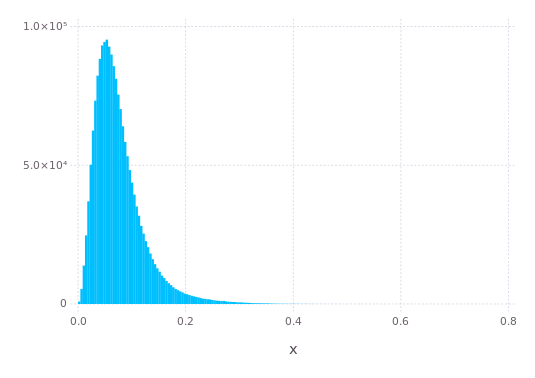

In [5]:
plot(x=halodf[:halo_spin], Geom.histogram)

In [10]:
# try to create something similar to spin parameter for EAGLE halos
spinmag = sqrt(3) * (subhalo[:GasSpin_x] .^ 2 .+ subhalo[:GasSpin_y] .^2 .+ subhalo[:GasSpin_z] .^ 2)
peebs = (1000.0 / 4.3e-3) * (spinmag .* (sqrt.(abs.(subhalo[:TotalEnergy])) ./ (subhalo[:Mh] .^ 1.5)))
vmaxs = (1.0 / sqrt(2)) * (spinmag ./ (subhalo[:Vmax] .* subhalo[:VmaxRadius]))

13200-element DataArrays.DataArray{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

### plot(x=peebs[peebs .> 0.0], Geom.histogram)

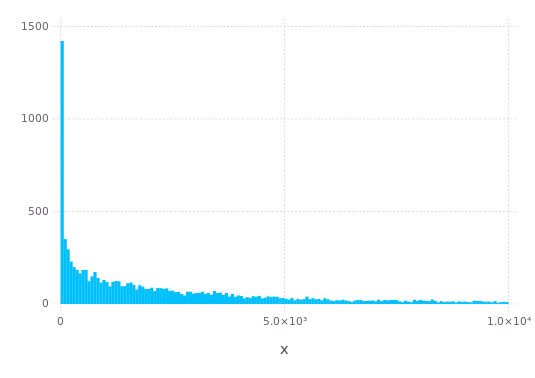

In [15]:
plot(x=vmaxs[0.0 .< vmaxs .< 10000.0], Geom.histogram)

In [4]:
# compute the environment deltas for the eagle galaxies

# first apply velocity distortions (assume z = 0)

subhalo[:dist_z] = subhalo[:CentreOfPotential_z] .+ 0.01 * subhalo[:Velocity_z]

for i in 1:size(subhalo)[1]
    if subhalo[:dist_z][i] > 100
        subhalo[:dist_z][i] = subhalo[:dist_z][i] - 100
    elseif subhalo[:dist_z][i] < 0
        subhalo[:dist_z][i] = subhalo[:dist_z][i] + 100
    end
end

println("done for loop")

# now build a KD Tree
treedat = zeros(size(subhalo)[1], 3)
treedat[:, 1] = subhalo[:CentreOfPotential_x]
treedat[:, 2] = subhalo[:CentreOfPotential_y]
treedat[:, 3] = subhalo[:dist_z]

# have to add a 10 Mpc "shell" to account for periodic boundary conditions
treeshellpts = deepcopy(treedat)

for i in 1:3

    shellmat = treedat[(treedat[:, i] .< 10), :]
    shellmat[:, i] += 100
    treeshellpts = vcat(treeshellpts, shellmat)
    shellmat = treedat[(treedat[:, i] .> 90), :]
    shellmat[:, i] -= 100
    treeshellpts = vcat(treeshellpts, shellmat)
    
    for j in (i + 1):3
        shellmat = treedat[(treedat[:, i] .< 10) & (treedat[:, j] .< 10), :]
        shellmat[:, i] += 100
        shellmat[:, j] += 100
        treeshellpts = vcat(treeshellpts, shellmat)
        shellmat = treedat[(treedat[:, i] .< 10) & (treedat[:, j] .> 90), :]
        shellmat[:, i] += 100
        shellmat[:, j] -= 100
        treeshellpts = vcat(treeshellpts, shellmat)
        shellmat = treedat[(treedat[:, i] .> 90) & (treedat[:, j] .< 10), :]
        shellmat[:, i] -= 100
        shellmat[:, j] += 100
        treeshellpts = vcat(treeshellpts, shellmat)
        shellmat = treedat[(treedat[:, i] .> 90) & (treedat[:, j] .> 90), :]
        shellmat[:, i] -= 100
        shellmat[:, j] -= 100
        treeshellpts = vcat(treeshellpts, shellmat)
    end 
end

# dear gawd there has to be a better way to do this...

shellmat = treedat[(treedat[:, 1] .< 10) & (treedat[:, 2] .< 10) & (treedat[:, 3] .< 10), :]
shellmat[:, 1] += 100
shellmat[:, 2] += 100
shellmat[:, 3] += 100
treeshellpts = vcat(treeshellpts, shellmat)
shellmat = treedat[(treedat[:, 1] .< 10) & (treedat[:, 2] .< 10) & (treedat[:, 3] .> 90), :]
shellmat[:, 1] += 100
shellmat[:, 2] += 100
shellmat[:, 3] -= 100
treeshellpts = vcat(treeshellpts, shellmat)
shellmat = treedat[(treedat[:, 1] .< 10) & (treedat[:, 2] .> 90) & (treedat[:, 3] .< 10), :]
shellmat[:, 1] += 100
shellmat[:, 2] -= 100
shellmat[:, 3] += 100
treeshellpts = vcat(treeshellpts, shellmat)
shellmat = treedat[(treedat[:, 1] .< 10) & (treedat[:, 2] .> 90) & (treedat[:, 3] .> 90), :]
shellmat[:, 1] += 100
shellmat[:, 2] -= 100
shellmat[:, 3] -= 100
treeshellpts = vcat(treeshellpts, shellmat)
shellmat = treedat[(treedat[:, 1] .> 90) & (treedat[:, 2] .< 10) & (treedat[:, 3] .< 10), :]
shellmat[:, 1] -= 100
shellmat[:, 2] += 100
shellmat[:, 3] += 100
treeshellpts = vcat(treeshellpts, shellmat)
shellmat = treedat[(treedat[:, 1] .> 90) & (treedat[:, 2] .< 10) & (treedat[:, 3] .> 90), :]
shellmat[:, 1] -= 100
shellmat[:, 2] += 100
shellmat[:, 3] -= 100
treeshellpts = vcat(treeshellpts, shellmat)
shellmat = treedat[(treedat[:, 1] .> 90) & (treedat[:, 2] .> 90) & (treedat[:, 3] .< 10), :]
shellmat[:, 1] -= 100
shellmat[:, 2] -= 100
shellmat[:, 3] += 100
treeshellpts = vcat(treeshellpts, shellmat)
shellmat = treedat[(treedat[:, 1] .> 90) & (treedat[:, 2] .> 90) & (treedat[:, 3] .> 90), :]
shellmat[:, 1] -= 100
shellmat[:, 2] -= 100
shellmat[:, 3] -= 100
treeshellpts = vcat(treeshellpts, shellmat)


println("got the treedat")

println(size(treedat)[1] / 1000000.0)
println(size(treeshellpts)[1] / 1728000.0)


done for loop


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] &(::BitArray{1}, ::BitArray{1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[4]:36 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::Module, ::String, ::String) at /home/kilian/.playground/packages/v0.6/Compat/src/Compat.jl:464
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/kilian/.playground/packages/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /home/kilian/.playground/packages/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[4], in expression starting on line 26
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] &(::BitArray{1}, ::BitArray{1}) at ./deprecated.jl:57
 [3] include_string(::Module, ::String, ::String) at /home/kilian/.playground/packages/v0.6/Compat/src/Compat.jl:464
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/kilian/.playground/packages/v0.6/IJulia/src/execute_request

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] &(::BitArray{1}, ::BitArray{1}) at ./deprecated.jl:57
 [3] include_string(::Module, ::String, ::String) at /home/kilian/.playground/packages/v0.6/Compat/src/Compat.jl:464
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/kilian/.playground/packages/v0.6/IJulia/src/execute_request.jl:154
 [5] eventloop(::ZMQ.Socket) at /home/kilian/.playground/packages/v0.6/IJulia/src/eventloop.jl:8
 [6] (::IJulia.##14#17)() at ./task.jl:335
while loading In[4], in expression starting on line 92


got the treedat
0.0132
0.012669560185185185


In [5]:
tree = KDTree(transpose(treeshellpts); leafsize=10)
println("built the tree")

deltas = zeros(size(treedat)[1])
spherevol = (4π / 3) * 1000
for i in 1:(size(treedat)[1])
    idxs = inrange(tree, treedat[i, :], 10, false)
    ρ = length(idxs) / spherevol
    deltas[i] = ρ / 0.0132
end

built the tree


In [6]:
subhalo[:ρ_env] = deltas
subhalo = subhalo[subhalo[:ρ_env] .> 0, :]
subhalo[:logρ] = log10.(subhalo[:ρ_env])

13200-element DataArrays.DataArray{Float64,1}:
 0.798917
 0.60173 
 0.85831 
 0.85173 
 0.825539
 0.82788 
 0.549594
 0.838262
 0.85173 
 0.591791
 0.848402
 0.737344
 0.795157
 ⋮       
 0.786254
 0.400352
 1.00785 
 0.810006
 0.850624
 0.743059
 0.801406
 0.850624
 0.310416
 1.16097 
 1.13413 
 0.713703

In [11]:
subhalo[:sSFR] = 1e9 * subhalo[:SFR] ./ subhalo[:Mass_Star]
subhalo[:sSFR][subhalo[:SFR] .> 0]

10211-element DataArrays.DataArray{Float64,1}:
 0.0323937 
 0.02247   
 0.00490115
 0.0344046 
 0.0387744 
 0.176382  
 0.0144088 
 0.0924467 
 0.0169814 
 0.0598383 
 0.0131567 
 0.0039363 
 0.03393   
 ⋮         
 0.0128822 
 0.0932861 
 0.0474934 
 0.0350326 
 0.030471  
 0.108959  
 0.00215918
 0.0567715 
 0.0829281 
 0.0111332 
 0.0485725 
 0.0228687 

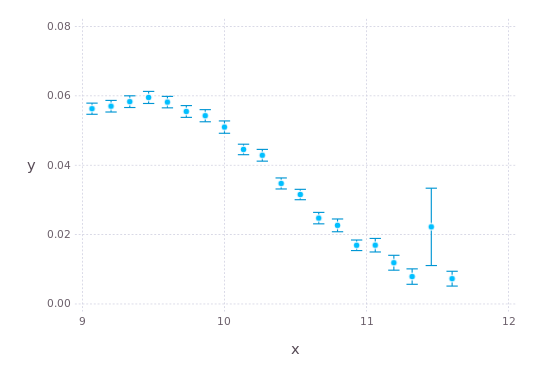

In [12]:
plot_binned_errs(log10.(subhalo[:Mass_Star]), subhalo[:sSFR], 20)

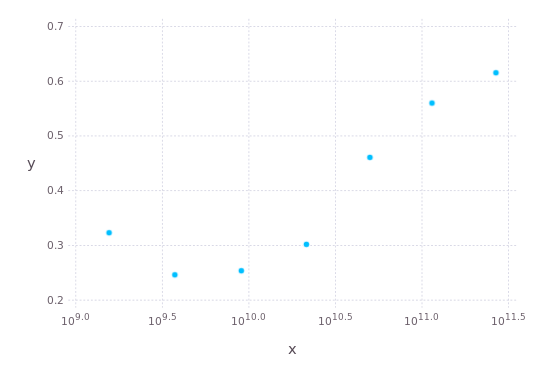

In [16]:
plot_quenched_frac(subhalo[:Mass_Star], subhalo[:sSFR], .01, 7)

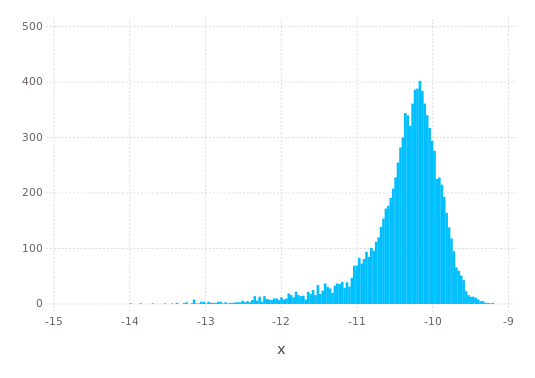

In [14]:
plot(x=log10.(subhalo[:sSFR]), Geom.histogram)

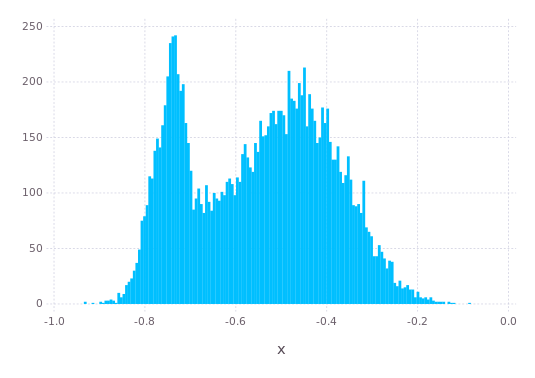

In [43]:
plot(x=subhalo[:M_r] - subhalo[:M_g], Geom.histogram)

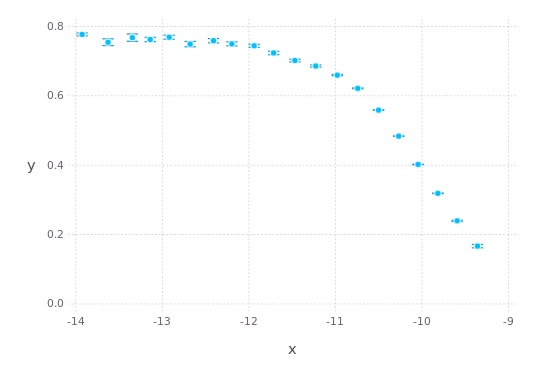

In [18]:
plot_binned_errs(log10.(subhalo[:sSFR][subhalo[:sSFR] .> 0]), subhalo[:M_g][subhalo[:sSFR] .> 0] - subhalo[:M_r][subhalo[:sSFR] .> 0], 20)

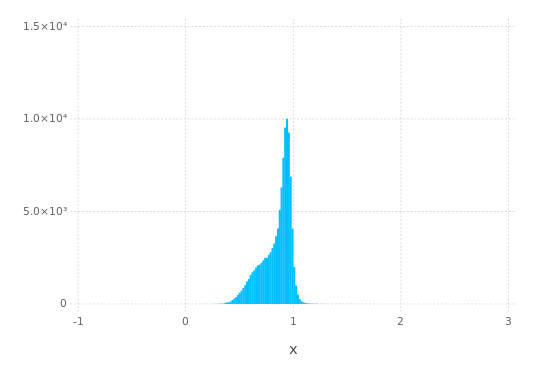

In [23]:
plot(x=allgals[:M_g] - allgals[:M_r], Geom.histogram)

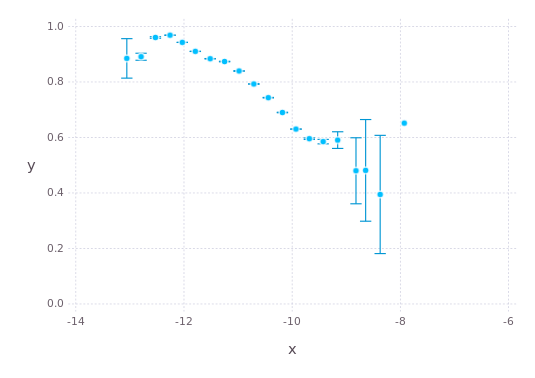

In [21]:
plot_binned_errs(allgals[:logsSFR], allgals[:M_g] - allgals[:M_r], 20)

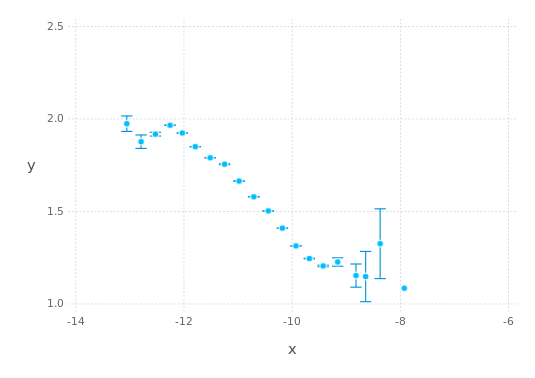

In [22]:
plot_binned_errs(allgals[:logsSFR], allgals[:Dn4000], 20)

In [25]:
cenquen = subhalo[subhalo[:SubGroupNumber] .== 0, :]
cenquen = cenquen[cenquen[:sSFR] .< 1e-11, :]
size(cenquen)

(1060, 49)

In [13]:
function plot_quenched_frac(mass, sfr, threshold, bins)
    
    medges = logspace(log10.(minimum(mass)), log10.(maximum(mass)), bins + 1)
    mmeans = [mean(mass[medges[i] .<= mass .<= medges[i + 1]]) for i in 1:bins]
    
    qfracs = []
    
    for i in 1:bins
        binsfr = sfr[medges[i] .<= mass .<= medges[i + 1]]
        qfrac = length(binsfr[binsfr .< threshold]) / length(binsfr)
        append!(qfracs, qfrac)
    end
    
    plot(x=mmeans, y=qfracs, Geom.point, Scale.x_log10)
end

plot_quenched_frac (generic function with 1 method)

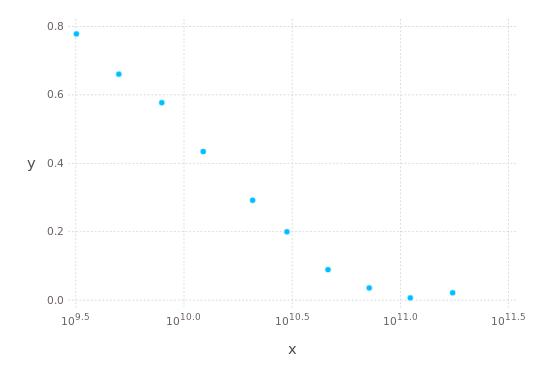

In [38]:
plot_quenched_frac(allgals[:stelM], allgals[:Dn4000], 1.6, 10)

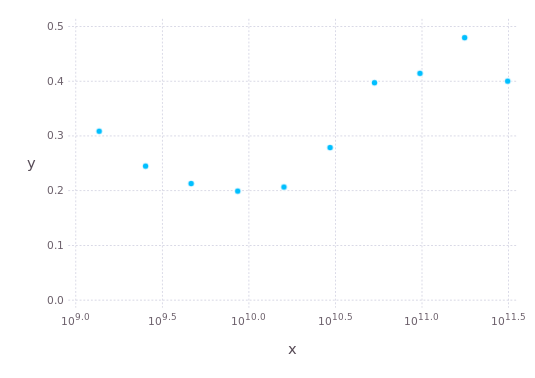

In [42]:
plot_quenched_frac(subhalo[:Mass_Star], subhalo[:sSFR], 3.1622777e-12, 10)

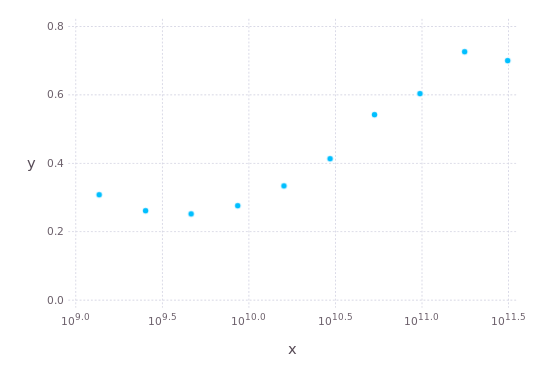

In [44]:
plot_quenched_frac(subhalo[:Mass_Star], subhalo[:M_r] - subhalo[:M_g], -0.65, 10)

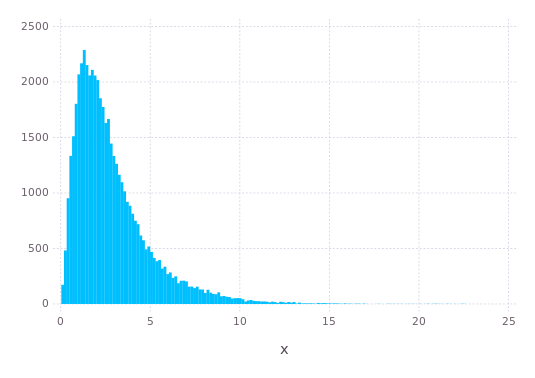

In [9]:
plot(x=fulldf[:ρ_env], Geom.histogram)

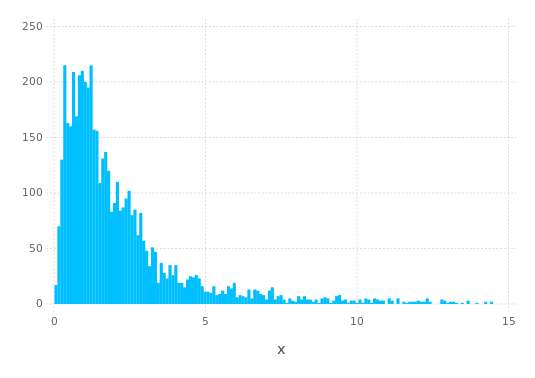

In [10]:
plot(x=cenquen[:ρ_env], Geom.histogram)

In [21]:
nbins = 5
maxM = maximum(fulldf[:log10M])
minM = minimum(fulldf[:log10M])
Medges = logspace(minM, maxM, nbins + 1)

means = []
meds = []

# set a new column with mean logM for the colours in our plot
fulldf[:meanlogM] = zeros(nrow(fulldf))
for i in 1:nbins
    if i == nbins
        meanM = mean(fulldf[:log10M][log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1])])
        medianM = median(fulldf[:log10M][log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1])])
        fulldf[:meanlogM][log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1])] = meanM
    else    
        meanM = mean(fulldf[:log10M][log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1])])
        medianM = median(fulldf[:log10M][log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1])])
        fulldf[:meanlogM][log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1])] = meanM
    end
    append!(means, meanM)
    append!(meds, medianM)
end

# let's make a similar column for the eagle data
subhalo[:log10M] = log10.(subhalo[:Mass_Star])

simeans = []
simeds = []

subhalo[:meanlogM] = zeros(nrow(subhalo))
for i in 1:nbins
    if i == nbins
        meanM = mean(subhalo[:log10M][log10(Medges[i]) .<= subhalo[:log10M] .<= log10(Medges[i + 1])])
        medianM = median(subhalo[:log10M][log10(Medges[i]) .<= subhalo[:log10M] .<= log10(Medges[i + 1])])
        subhalo[:meanlogM][log10(Medges[i]) .<= subhalo[:log10M] .<= log10(Medges[i + 1])] = meanM
    else    
        meanM = mean(subhalo[:log10M][log10(Medges[i]) .<= subhalo[:log10M] .< log10(Medges[i + 1])])
        medianM = median(subhalo[:log10M][log10(Medges[i]) .<= subhalo[:log10M] .< log10(Medges[i + 1])])
        subhalo[:meanlogM][log10(Medges[i]) .<= subhalo[:log10M] .< log10(Medges[i + 1])] = meanM
    end
    append!(simeans, meanM)
    append!(simeds, medianM)
end

In [43]:
Medges

6-element Array{Float64,1}:
 2.53003e9 
 6.24962e9 
 1.54377e10
 3.81338e10
 9.41973e10
 2.32684e11

In [22]:
# get the density bins to plot in
nrobins = 20
maxdro = maximum(fulldf[:logρ])
mindro = minimum(fulldf[:logρ])
drobins = linspace(mindro, maxdro, nrobins + 1)

dromeans = []
for i in 1:nrobins
    if i == nrobins
        meanro = mean(fulldf[:logρ][drobins[i] .<= fulldf[:logρ] .<= drobins[i + 1]])
    else    
        meanro = mean(fulldf[:logρ][drobins[i] .<= fulldf[:logρ] .< drobins[i + 1]])
    end
    append!(dromeans, meanro)
end

maxsro = maximum(subhalo[:logρ])
minsro = minimum(subhalo[:logρ])
srobins = linspace(minsro, maxsro, nrobins + 1)

sromeans = []
for i in 1:nrobins
    if i == nrobins
        meanro = mean(subhalo[:logρ][srobins[i] .<= subhalo[:logρ] .<= srobins[i + 1]])
    else    
        meanro = mean(subhalo[:logρ][srobins[i] .<= subhalo[:logρ] .< srobins[i + 1]])
    end
    append!(sromeans, meanro)
end

In [4]:
function get_errbar(binpts)

    npts = length(binpts)
    ymean = mean(binpts)
    ystd = std(binpts)
    yerr = ystd / sqrt(npts)
    
    return ymean, yerr
end


function plot_binned_errs(x, y, bins)
    
    xedges = linspace(minimum(x), maximum(x), bins + 1)
    xmeans = [mean(x[xedges[i] .<= x .<= xedges[i + 1]]) for i in 1:bins]
    
    ymeans = []
    ymins = []
    ymaxs = []
    
    for i in 1:bins
        ymean, yerr = get_errbar(y[xedges[i] .<= x .<= xedges[i + 1]])
        append!(ymeans, ymean)
        append!(ymins, ymean - yerr)
        append!(ymaxs, ymean + yerr)
    end
    
    plot(x=xmeans, y=ymeans, ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar)
end

plot_binned_errs (generic function with 1 method)

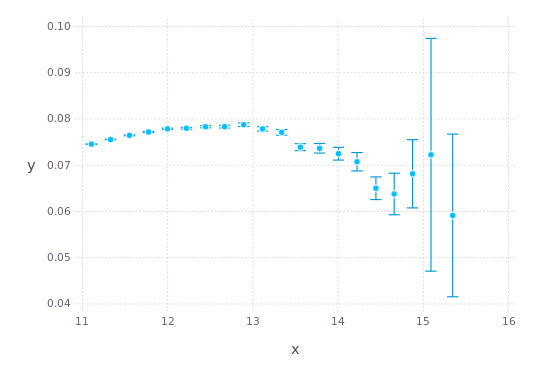

In [6]:
plot_binned_errs(log10.(halodf[:halo_mvir]), halodf[:halo_spin], 20)

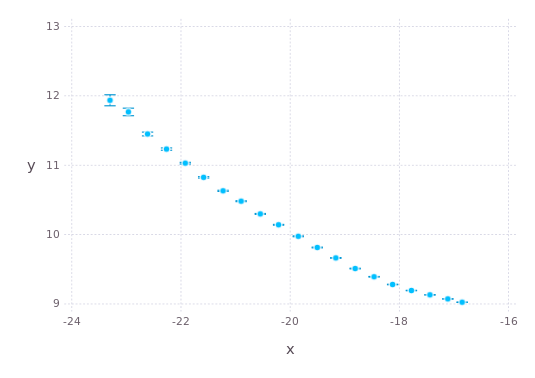

  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31
  likely near /home/kilian/.playground/packages/v0.6/IJulia/src/kernel.jl:31

In [5]:
plot_binned_errs(subhalo[:M_r], log10.(subhalo[:MassType_Star]), 20)

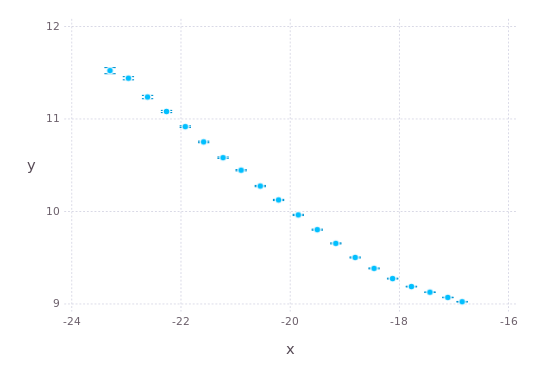

In [10]:
plot_binned_errs(subhalo[:M_r], log10.(subhalo[:Mass_Star]), 20)

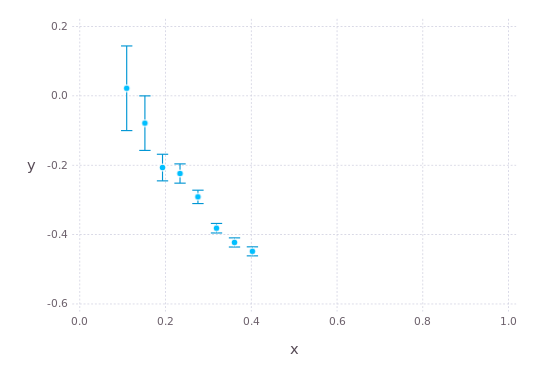

In [8]:
plot_binned_errs(subhalo[:M_g] - subhalo[:M_r], log10.(subhalo[:SFR]), 20)

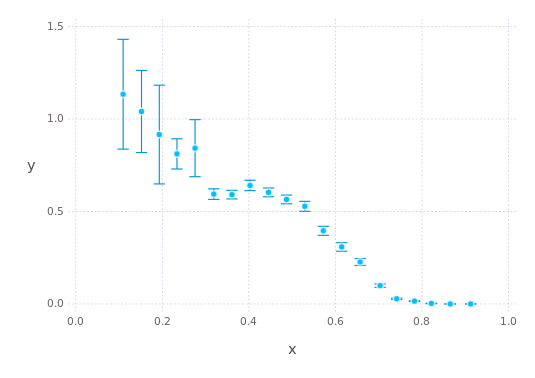

In [10]:
plot_binned_errs(subhalo[:M_g] - subhalo[:M_r], subhalo[:SFR], 20)

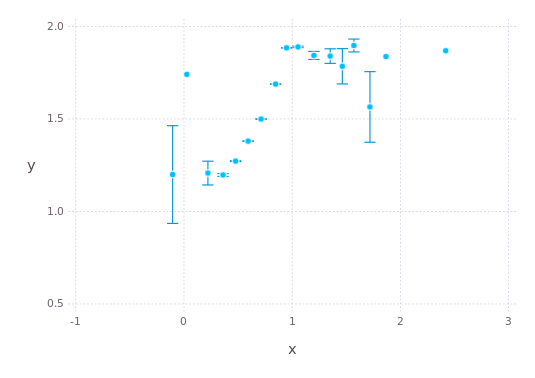

In [15]:
plot_binned_errs(allgals[:M_g] - allgals[:M_r], allgals[:Dn4000], 20)

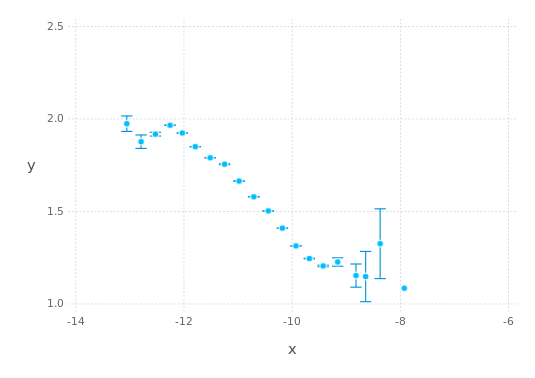

In [16]:
plot_binned_errs(allgals[:logsSFR], allgals[:Dn4000], 20)

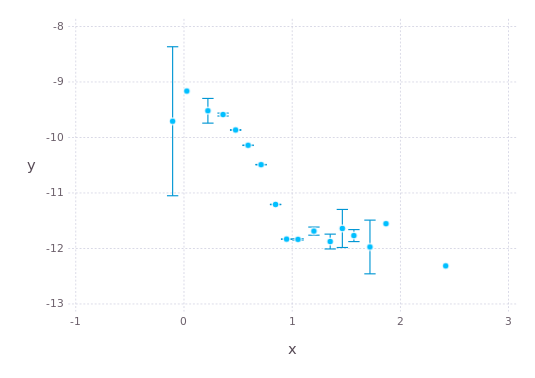

In [13]:
plot_binned_errs(allgals[:M_g] - allgals[:M_r], allgals[:logsSFR], 20)

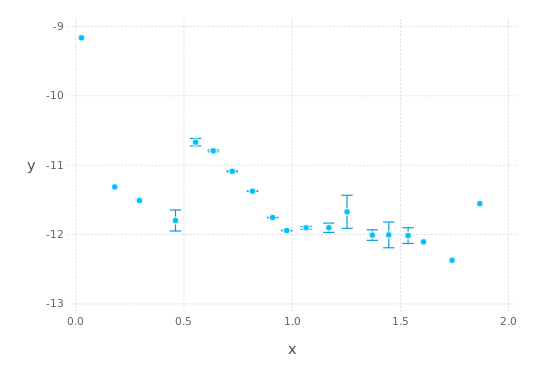

In [14]:
plot_binned_errs(fulldf[:M_g] - fulldf[:M_r], fulldf[:logsSFR], 20)

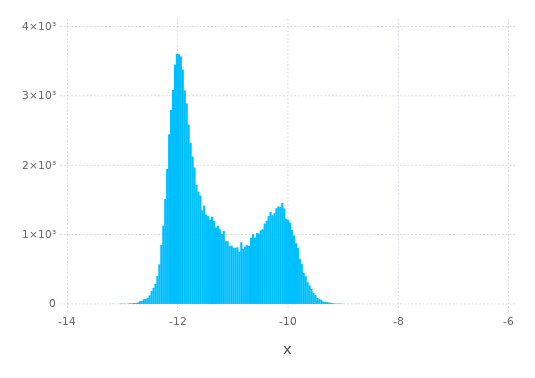

In [27]:
plot(x=allgals[:logsSFR], Geom.histogram)

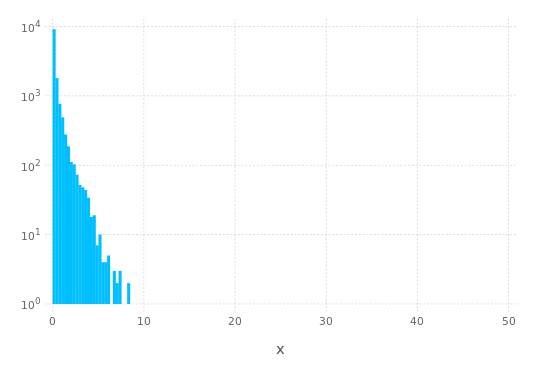

In [25]:
plot(x=subhalo[:SFR], Geom.histogram, Scale.y_log10)

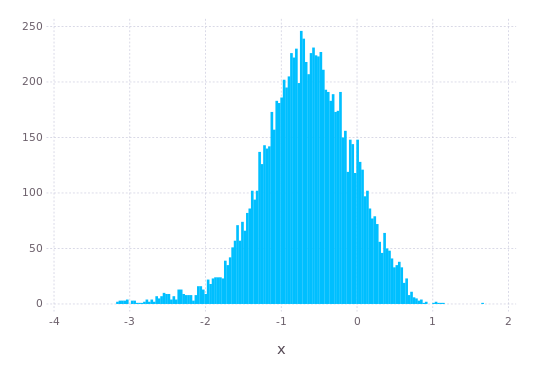

In [29]:
plot(x=log10.(subhalo[:SFR]), Geom.histogram) #, Scale.y_log10)

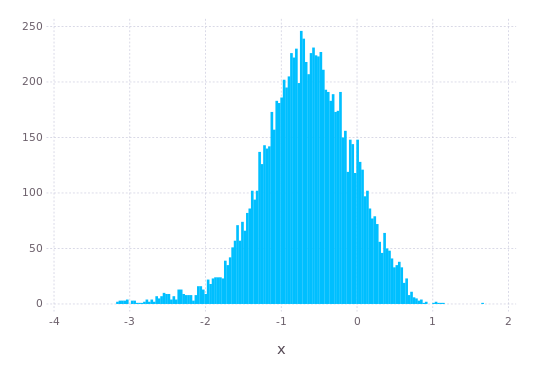

In [12]:
plot(x=log10.(subhalo[:SFR]), Geom.histogram)

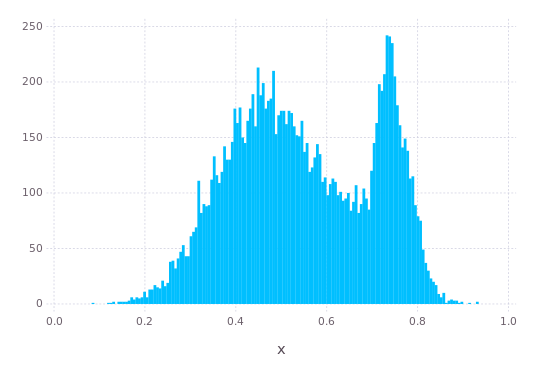

In [22]:
plot(x=(subhalo[:M_g] - subhalo[:M_r]), Geom.histogram)

stacking...


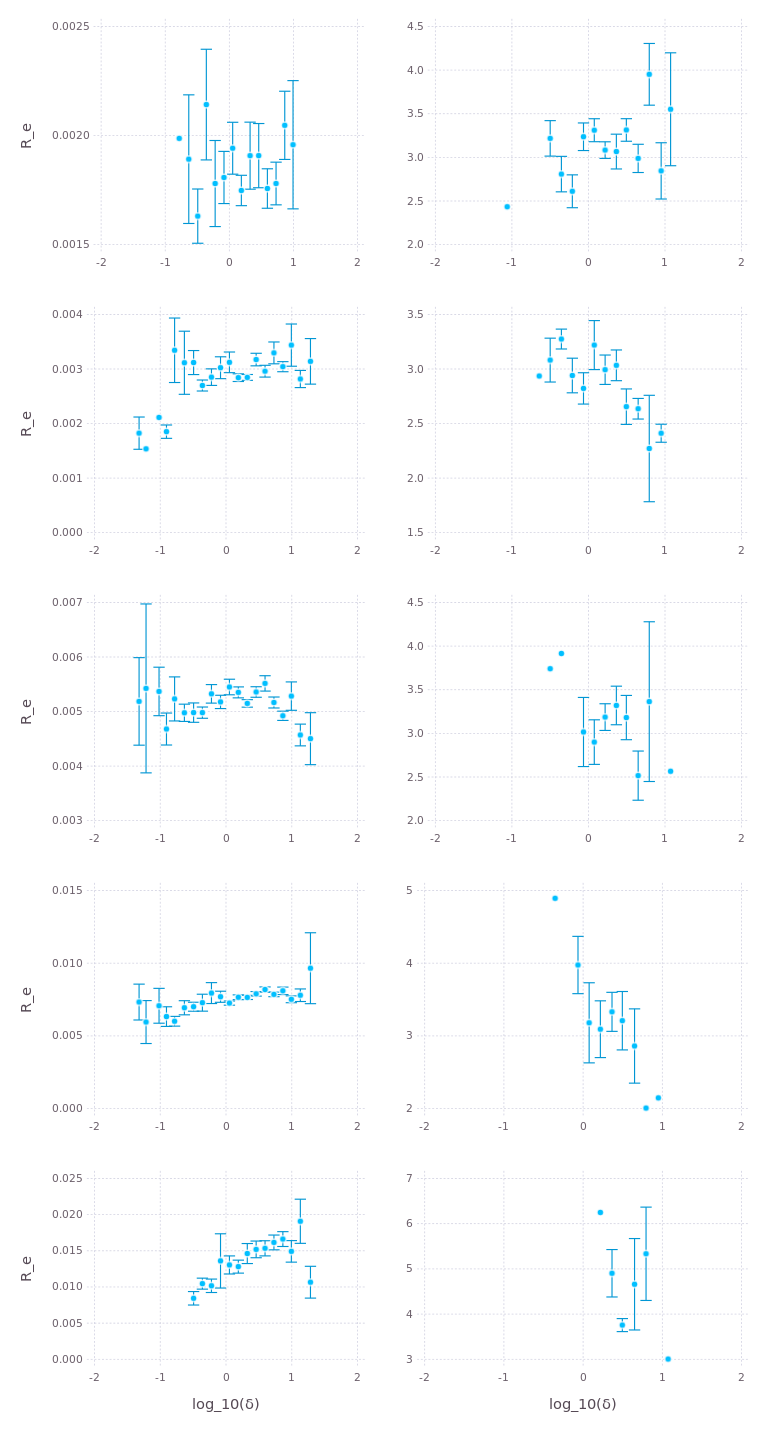

drawing...


In [38]:
# compare halfmass radius plots and see how we do

subplots = Array{Gadfly.Plot, 1}(10)

for i in 1:nbins

    if i == nbins
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .<= log10(Medges[i + 1]), :]
    else
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .< log10(Medges[i + 1]), :]
    end

    # now get the values for each bin in density
    dmeans = []
    dmins = []
    dmaxs = []
    smeans = []
    smins = []
    smaxs = []
    for j in 1:nrobins
        dmean, derr = get_errbar(subdat[:R_e][drobins[j] .<= subdat[:logρ] .<= drobins[j + 1]])
        smean, serr = get_errbar(subsim[:R_halfmass30_projected][srobins[j] .<= subsim[:logρ] .<= srobins[j + 1]])
        append!(dmeans, dmean)
        append!(dmins, dmean - derr)
        append!(dmaxs, dmean + derr)
        append!(smeans, smean)
        append!(smins, smean - serr)
        append!(smaxs, smean + serr)
    end
    
    if i == nbins
        # the first column has the data
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel("log_10(δ)"), Guide.ylabel("R_e"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 1.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        # and the simulation is in the next column
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel("log_10(δ)"), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 1.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
        
        
    else
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel(nothing), Guide.ylabel("R_e"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 0.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel(nothing), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 0.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
    end    
end

println("stacking...")
fig = hstack(vstack(subplots[1:5]), vstack(subplots[6:10]))
println("drawing...")
draw(PNG("datsimcomp_errbar_halfmass_30_v_rho.png", 8inch, 15inch), fig)
display("image/png", read("datsimcomp_errbar_halfmass_30_v_rho.png"))


stacking...


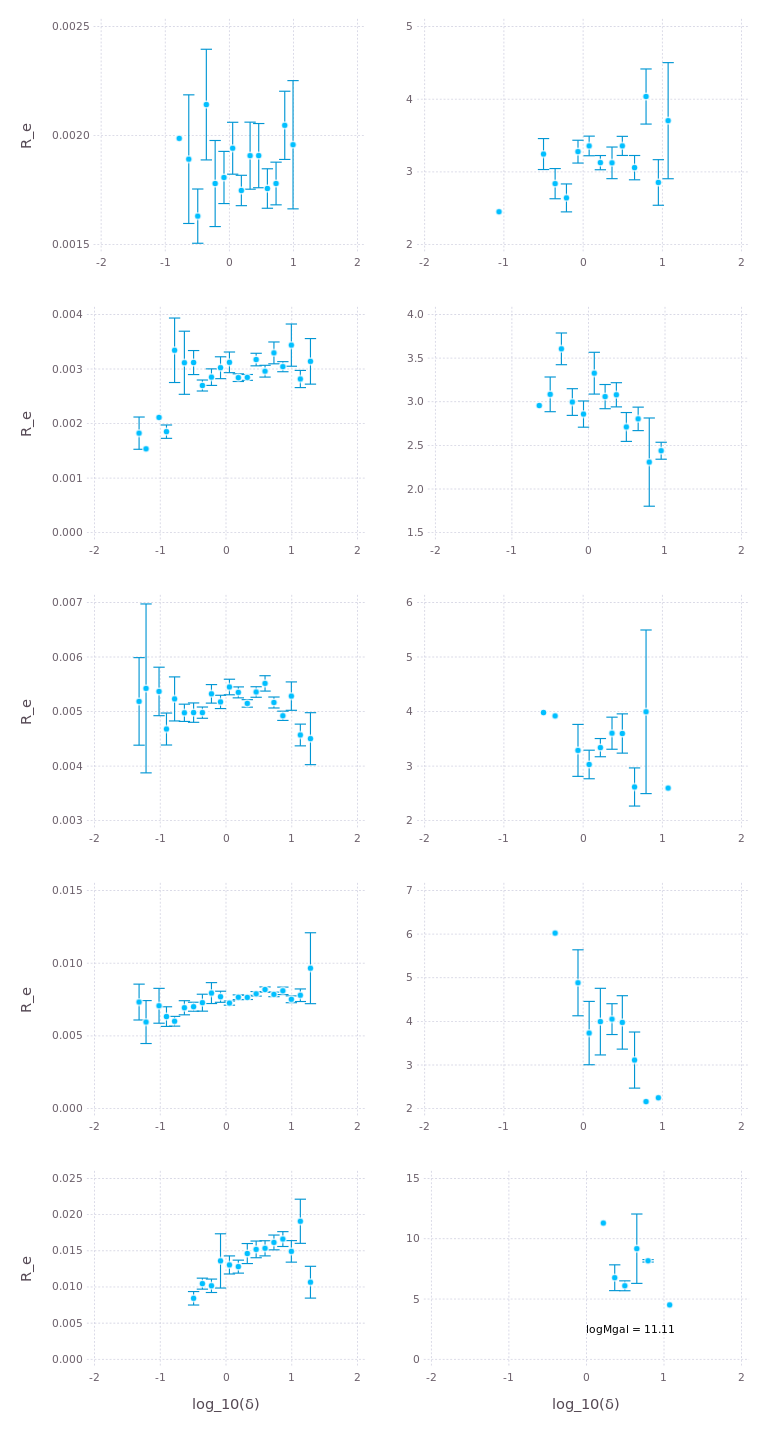

drawing...


In [39]:
# compare halfmass radius plots and see how we do

subplots = Array{Gadfly.Plot, 1}(10)

for i in 1:nbins

    if i == nbins
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .<= log10(Medges[i + 1]), :]
    else
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .< log10(Medges[i + 1]), :]
    end

    # now get the values for each bin in density
    dmeans = []
    dmins = []
    dmaxs = []
    smeans = []
    smins = []
    smaxs = []
    for j in 1:nrobins
        dmean, derr = get_errbar(subdat[:R_e][drobins[j] .<= subdat[:logρ] .<= drobins[j + 1]])
        smean, serr = get_errbar(subsim[:HalfMassProjRad_Star][srobins[j] .<= subsim[:logρ] .<= srobins[j + 1]])
        append!(dmeans, dmean)
        append!(dmins, dmean - derr)
        append!(dmaxs, dmean + derr)
        append!(smeans, smean)
        append!(smins, smean - serr)
        append!(smaxs, smean + serr)
    end
    
    if i == nbins
        # the first column has the data
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel("log_10(δ)"), Guide.ylabel("R_e"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 1.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        # and the simulation is in the next column
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel("log_10(δ)"), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 1.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
        
        
    else
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel(nothing), Guide.ylabel("R_e"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 0.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel(nothing), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 0.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
    end    
end

println("stacking...")
fig = hstack(vstack(subplots[1:5]), vstack(subplots[6:10]))
println("drawing...")
draw(PNG("datsimcomp_errbar_halfmassprojradstar_v_rho.png", 8inch, 15inch), fig)
display("image/png", read("datsimcomp_errbar_halfmassprojradstar_v_rho.png"))


stacking...


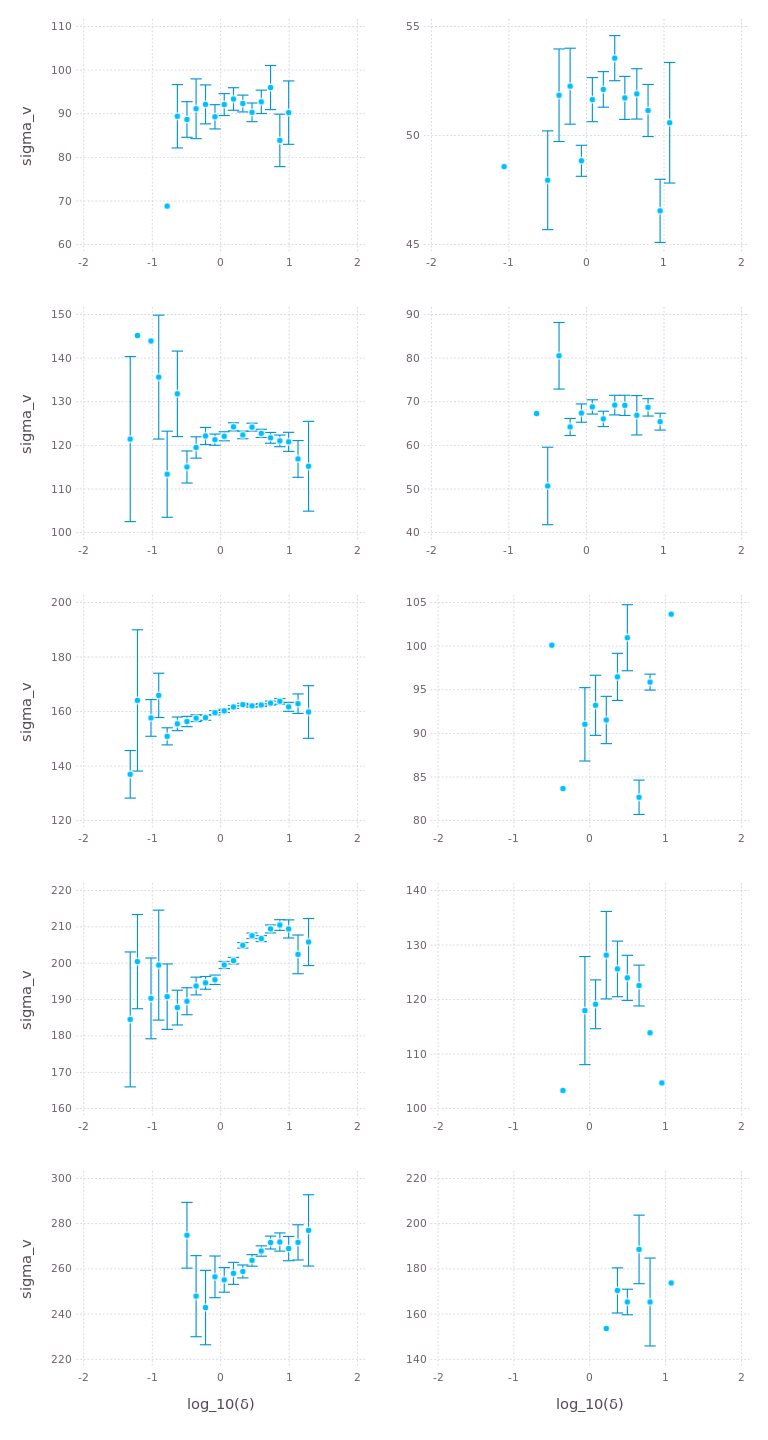

drawing...


In [40]:
# compare halfmass radius plots and see how we do

subplots = Array{Gadfly.Plot, 1}(10)

for i in 1:nbins

    if i == nbins
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .<= log10(Medges[i + 1]), :]
    else
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .< log10(Medges[i + 1]), :]
    end

    # now get the values for each bin in density
    dmeans = []
    dmins = []
    dmaxs = []
    smeans = []
    smins = []
    smaxs = []
    for j in 1:nrobins
        dmean, derr = get_errbar(subdat[:vdisp][drobins[j] .<= subdat[:logρ] .<= drobins[j + 1]])
        smean, serr = get_errbar(subsim[:StellarVelDisp][srobins[j] .<= subsim[:logρ] .<= srobins[j + 1]])
        append!(dmeans, dmean)
        append!(dmins, dmean - derr)
        append!(dmaxs, dmean + derr)
        append!(smeans, smean)
        append!(smins, smean - serr)
        append!(smaxs, smean + serr)
    end
    
    if i == nbins
        # the first column has the data
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel("log_10(δ)"), Guide.ylabel("sigma_v"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 1.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        # and the simulation is in the next column
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel("log_10(δ)"), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 1.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
        
        
    else
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel(nothing), Guide.ylabel("sigma_v"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 0.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel(nothing), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 0.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
    end    
end

println("stacking...")
fig = hstack(vstack(subplots[1:5]), vstack(subplots[6:10]))
println("drawing...")
draw(PNG("datsimcomp_errbar_stellarveldisp_v_rho.png", 8inch, 15inch), fig)
display("image/png", read("datsimcomp_errbar_stellarveldisp_v_rho.png"))


stacking...


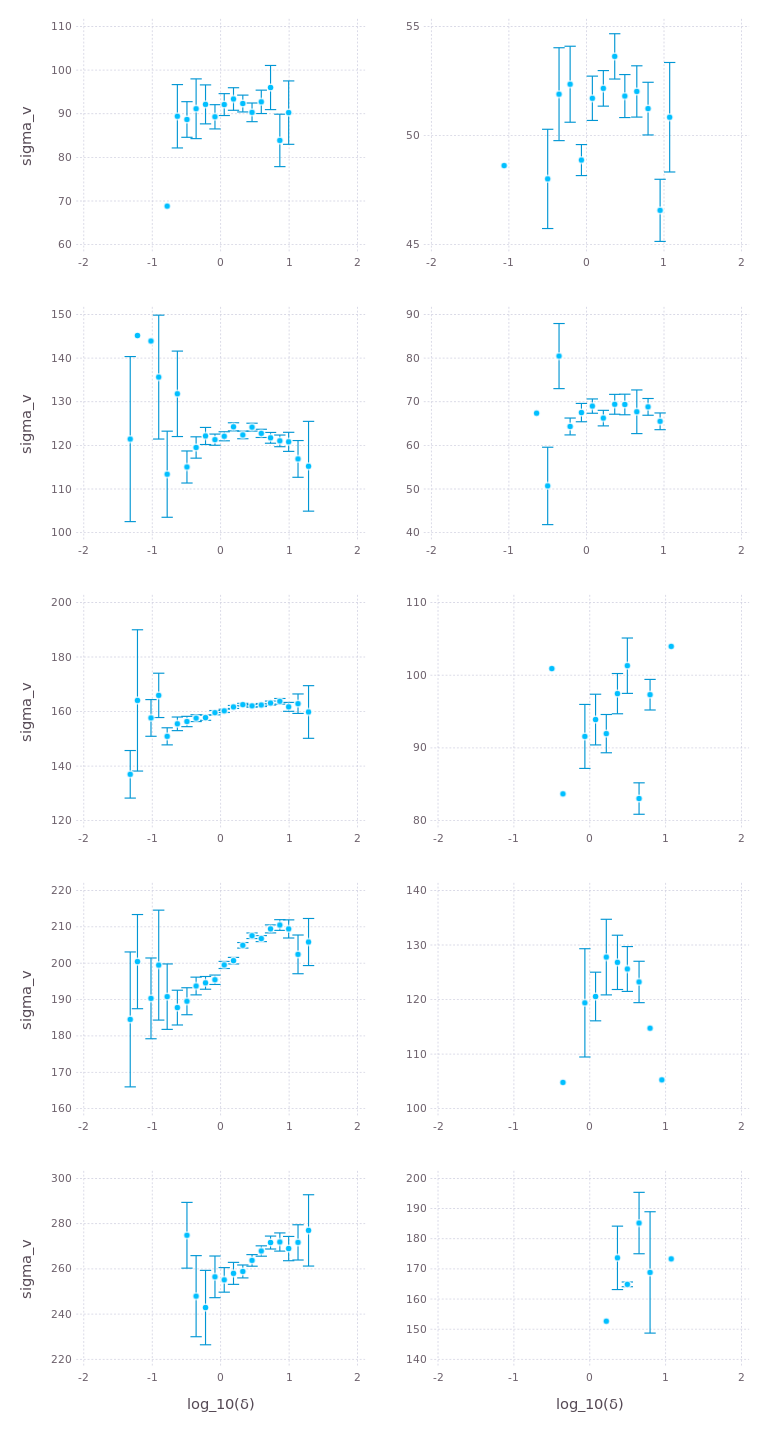

drawing...


In [41]:
# compare halfmass radius plots and see how we do

subplots = Array{Gadfly.Plot, 1}(10)

for i in 1:nbins

    if i == nbins
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .<= log10(Medges[i + 1]), :]
    else
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .< log10(Medges[i + 1]), :]
    end

    # now get the values for each bin in density
    dmeans = []
    dmins = []
    dmaxs = []
    smeans = []
    smins = []
    smaxs = []
    for j in 1:nrobins
        dmean, derr = get_errbar(subdat[:vdisp][drobins[j] .<= subdat[:logρ] .<= drobins[j + 1]])
        smean, serr = get_errbar(subsim[:VelDisp][srobins[j] .<= subsim[:logρ] .<= srobins[j + 1]])
        append!(dmeans, dmean)
        append!(dmins, dmean - derr)
        append!(dmaxs, dmean + derr)
        append!(smeans, smean)
        append!(smins, smean - serr)
        append!(smaxs, smean + serr)
    end
    
    if i == nbins
        # the first column has the data
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel("log_10(δ)"), Guide.ylabel("sigma_v"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 1.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        # and the simulation is in the next column
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel("log_10(δ)"), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 1.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
        
        
    else
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel(nothing), Guide.ylabel("sigma_v"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 0.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel(nothing), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 0.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
    end    
end

println("stacking...")
fig = hstack(vstack(subplots[1:5]), vstack(subplots[6:10]))
println("drawing...")
draw(PNG("datsimcomp_errbar_veldisp_v_rho.png", 8inch, 15inch), fig)
display("image/png", read("datsimcomp_errbar_veldisp_v_rho.png"))


stacking...


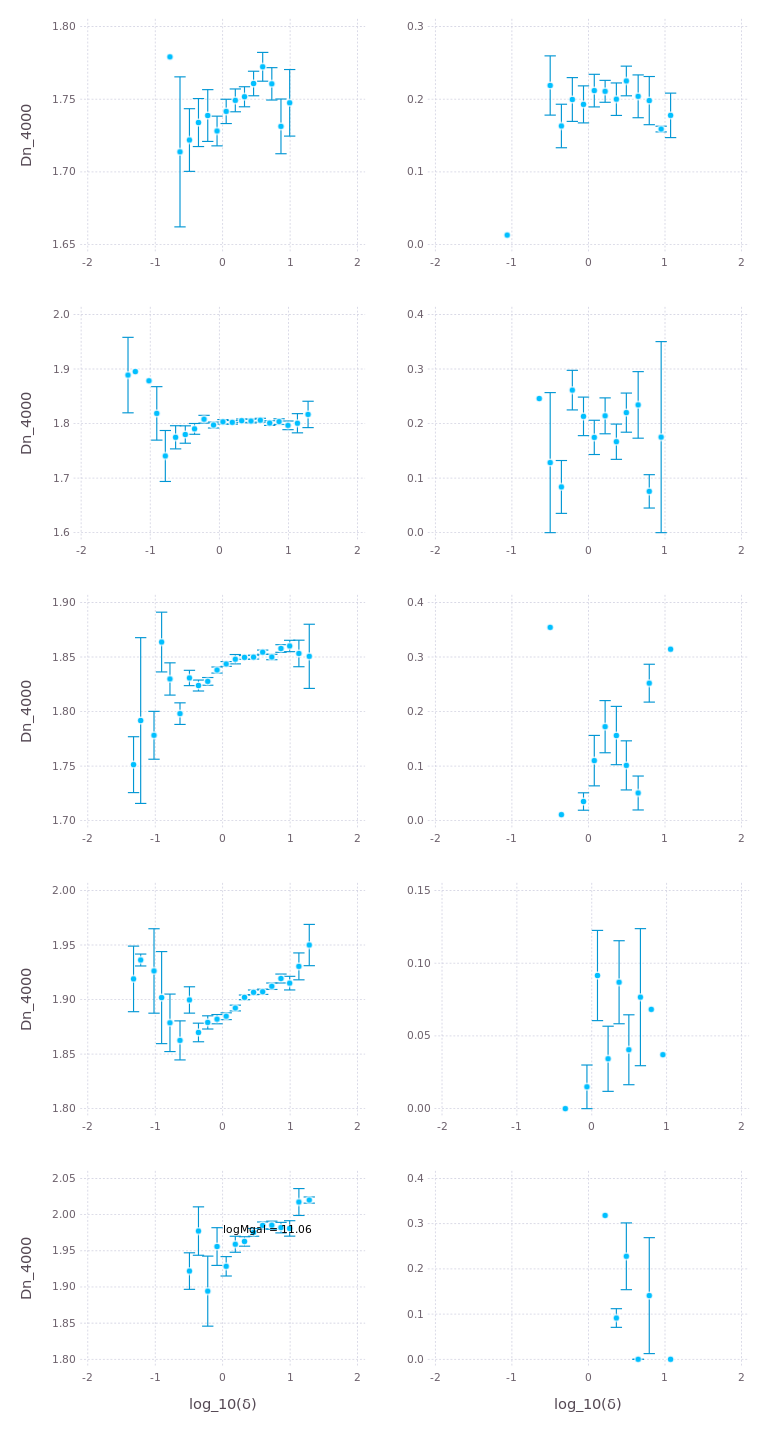

drawing...


In [42]:
# compare halfmass radius plots and see how we do

subplots = Array{Gadfly.Plot, 1}(10)

for i in 1:nbins

    if i == nbins
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .<= log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .<= log10(Medges[i + 1]), :]
    else
        subdat = fulldf[log10(Medges[i]) .<= fulldf[:log10M] .< log10(Medges[i + 1]), :]
        subsim = cenquen[log10(Medges[i]) .<= cenquen[:log10M] .< log10(Medges[i + 1]), :]
    end

    # now get the values for each bin in density
    dmeans = []
    dmins = []
    dmaxs = []
    smeans = []
    smins = []
    smaxs = []
    for j in 1:nrobins
        dmean, derr = get_errbar(subdat[:Dn4000][drobins[j] .<= subdat[:logρ] .<= drobins[j + 1]])
        smean, serr = get_errbar(subsim[:SFR][srobins[j] .<= subsim[:logρ] .<= srobins[j + 1]])
        append!(dmeans, dmean)
        append!(dmins, dmean - derr)
        append!(dmaxs, dmean + derr)
        append!(smeans, smean)
        append!(smins, smean - serr)
        append!(smaxs, smean + serr)
    end
    
    if i == nbins
        # the first column has the data
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel("log_10(δ)"), Guide.ylabel("Dn_4000"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 1.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        # and the simulation is in the next column
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel("log_10(δ)"), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 1.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
        
        
    else
        subplots[i] = plot(x=dromeans, y=dmeans, ymin=dmins, ymax=dmaxs, Geom.point, Geom.errorbar,        
                           Guide.xlabel(nothing), Guide.ylabel("Dn_4000"),
                           Guide.annotation(compose(context(),
                                                    Compose.text(0, 0.97,
                                                    Formatting.format("logMgal = {1:.2f}", means[i])))))
        
        subplots[i + nbins] = plot(x=sromeans, y=smeans, ymin=smins, ymax=smaxs, Geom.point, Geom.errorbar,
                                       Guide.xlabel(nothing), Guide.ylabel(nothing),
                                       Guide.annotation(compose(context(),
                                                        Compose.text(0, 0.97,
                                                        Formatting.format("logMgal = {1:.2f}", simeans[i])))))
    end    
end

println("stacking...")
fig = hstack(vstack(subplots[1:5]), vstack(subplots[6:10]))
println("drawing...")
draw(PNG("datsimcomp_errbar_SFR_v_rho.png", 8inch, 15inch), fig)
display("image/png", read("datsimcomp_errbar_SFR_v_rho.png"))
